# Proyek Analisis Data: Bike Sharing Dataset 
- **Nama:** Nabil Ishfaq Febriyanto
- **Email:** nabil.ishfaqfebriyanto@gmail.com
- **ID Dicoding:** nabilishfaq

## Menentukan Pertanyaan Bisnis

- Musim apa yang memiliki jumlah penyewaan sepeda tertinggi?
- Bagaimana suhu memengaruhi jumlah penyewaan sepeda harian?
- Bagaimana suhu memengaruhi penyewaan sepeda pada jam tertentu?
- Bagaimana kondisi cuaca memengaruhi total penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('C:/Users/NABIL/Documents/Tugas Matkul/Bangkit/Dicoding/submission/data/day.csv')
hour_df = pd.read_csv('C:/Users/NABIL/Documents/Tugas Matkul/Bangkit/Dicoding/submission/data/hour.csv')

**Insight:**
- Load dataset day.csv
- Load dataset hour.csv

### Assessing Data

In [3]:
print("Checking missing values for 'day.csv':")
print(day_df.isnull().sum())

print("\nChecking missing values for 'hour.csv':")
print(hour_df.isnull().sum())

print("\nData types and summary for 'day.csv':")
print(day_df.info())

print("\nData types and summary for 'hour.csv':")
print(hour_df.info())

Checking missing values for 'day.csv':
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Checking missing values for 'hour.csv':
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data types and summary for 'day.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          

### Cleaning Data

In [4]:
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

day_df['season'] = day_df['season'].astype('category')
hour_df['season'] = hour_df['season'].astype('category')


In [5]:
# Displaying the first few rows of the cleaned day.csv dataset
print("Cleaned Data - day.csv (5 rows):")
print(day_df.head())

# Displaying the first few rows of the cleaned hour.csv dataset
print("\nCleaned Data - hour.csv (5 rows):")
print(hour_df.head())

Cleaned Data - day.csv (5 rows):
   instant      dteday season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01      1   0     1        0        6           0   
1        2  2011-01-02      1   0     1        0        0           0   
2        3  2011-01-03      1   0     1        0        1           1   
3        4  2011-01-04      1   0     1        0        2           1   
4        5  2011-01-05      1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

**Insight:**
- Menampilkan beberapa data yang sudah di "cleaning" dari dataset day.csv 
- Menampilkan beberapa data yang sudah di "cleaning" dari dataset hour.csv 

## Exploratory Data Analysis (EDA)

### Explore ...

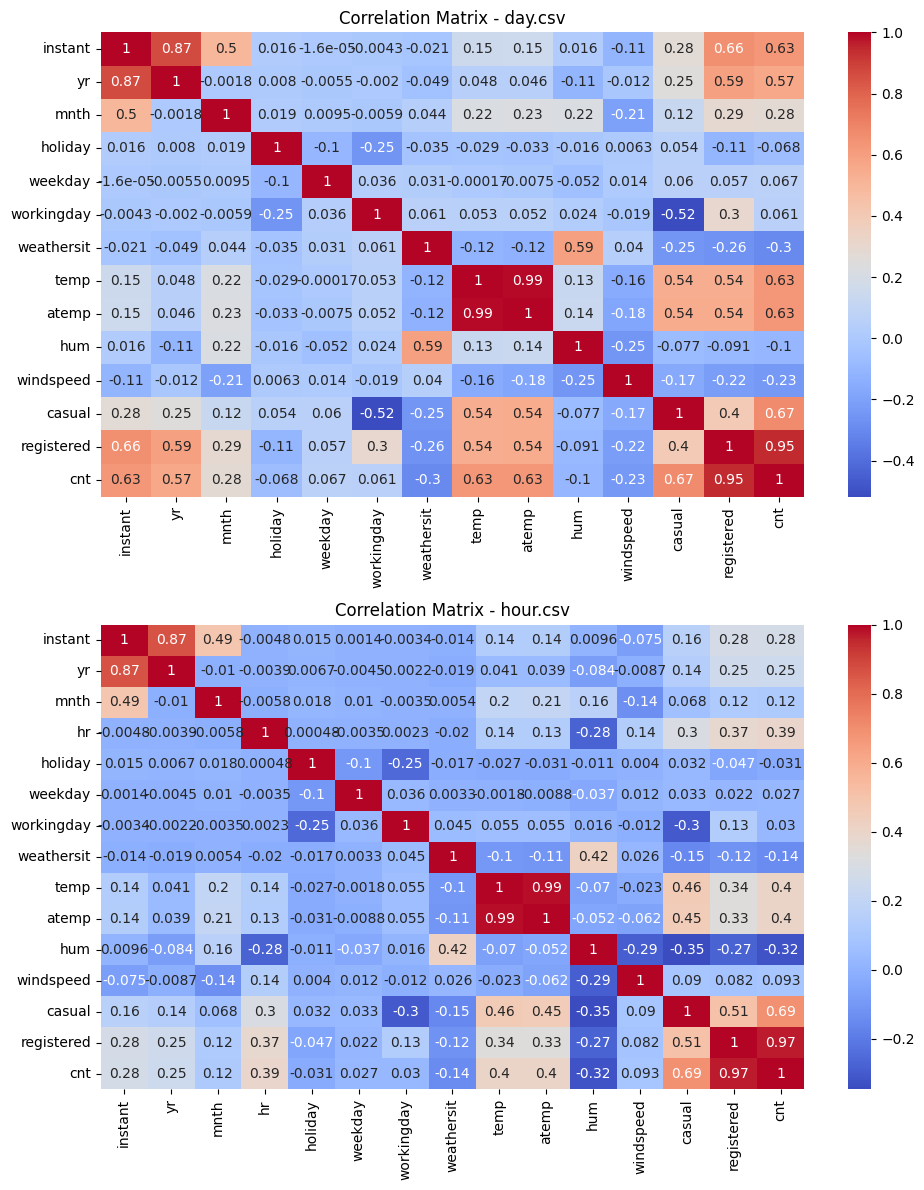

In [6]:
numerical_cols_day = day_df.select_dtypes(include=['float64', 'int64'])
numerical_cols_hour = hour_df.select_dtypes(include=['float64', 'int64'])

fig, axes = plt.subplots(2, 1, figsize=(10, 12))  


sns.heatmap(numerical_cols_day.corr(), annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix - day.csv')


sns.heatmap(numerical_cols_hour.corr(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix - hour.csv')


plt.tight_layout()
plt.show()

**Insight:**
- Kode ini mengekstrak kolom numerik dari dua dataset (day_df dan hour_df) dan kemudian menghitung matriks korelasi untuk masing-masing. Ini memungkinkan kita untuk melihat hubungan antara berbagai fitur numerik dalam kedua dataset.
- Dengan menggunakan sns.heatmap, kita dapat dengan jelas melihat seberapa kuat hubungan antara variabel-variabel yang berbeda. Warna dalam heatmap (dari cmap='coolwarm') menunjukkan kekuatan dan arah korelasi:
  - Warna merah menunjukkan korelasi positif (hubungan langsung) antara variabel.
  - Warna biru menunjukkan korelasi negatif (hubungan terbalik) antara variabel.
- Dengan menampilkan dua heatmap terpisah untuk data harian dan data jam, kita bisa membandingkan bagaimana hubungan antar variabel bervariasi antara kedua dataset. Misalnya, korelasi yang mungkin kuat di tingkat jam mungkin tidak sama kuatnya di tingkat harian dan sebaliknya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

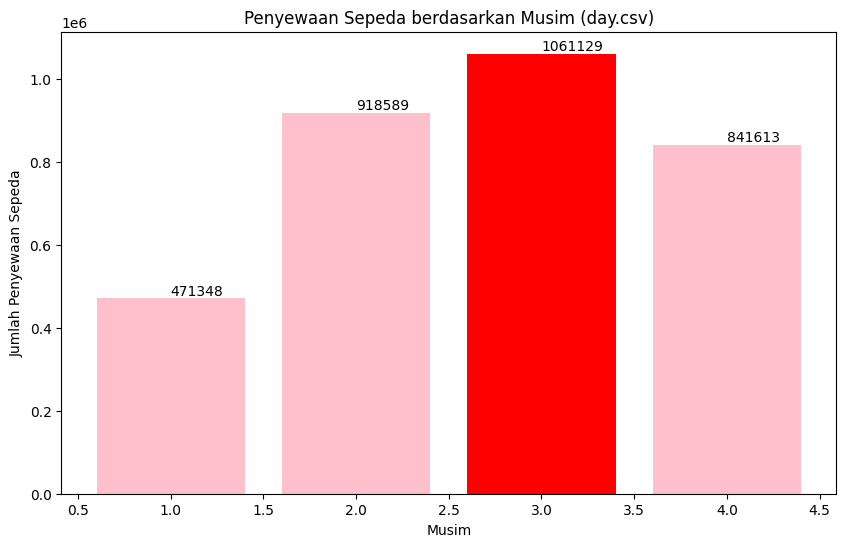

In [7]:

day_df = pd.read_csv('C:/Users/NABIL/Documents/Tugas Matkul/Bangkit/Dicoding/submission/data/day.csv')


season_counts = day_df.groupby('season')['cnt'].sum().reset_index()

max_value = season_counts['cnt'].max()


season_counts['color'] = season_counts['cnt'].apply(lambda x: 'red' if x == max_value else 'pink')

plt.figure(figsize=(10, 6))
bars = plt.bar(season_counts['season'], season_counts['cnt'], color=season_counts['color'])

plt.title('Penyewaan Sepeda berdasarkan Musim (day.csv)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # Va = vertical alignment

plt.show()


**Insight:**
- Kode ini mengelompokkan data berdasarkan kolom season dan menghitung total jumlah penyewaan sepeda (cnt) untuk setiap musim. Ini memberikan gambaran umum tentang seberapa banyak sepeda disewa selama setiap musim.
- Dengan menggunakan fungsi max(), kode ini menentukan musim mana yang memiliki jumlah penyewaan tertinggi. Musim tersebut akan ditandai dengan warna merah, sementara musim lainnya akan berwarna pink. Ini memberikan visual yang jelas tentang musim mana yang paling banyak diminati.
- Dari grafik, kita bisa menarik kesimpulan tentang pola penyewaan sepeda sepanjang tahun. Misalnya, jika musim panas memiliki penyewaan yang lebih tinggi dibandingkan musim lainnya, ini bisa menunjukkan bahwa cuaca yang lebih baik mendorong lebih banyak orang untuk menggunakan sepeda.

### Pertanyaan 2:

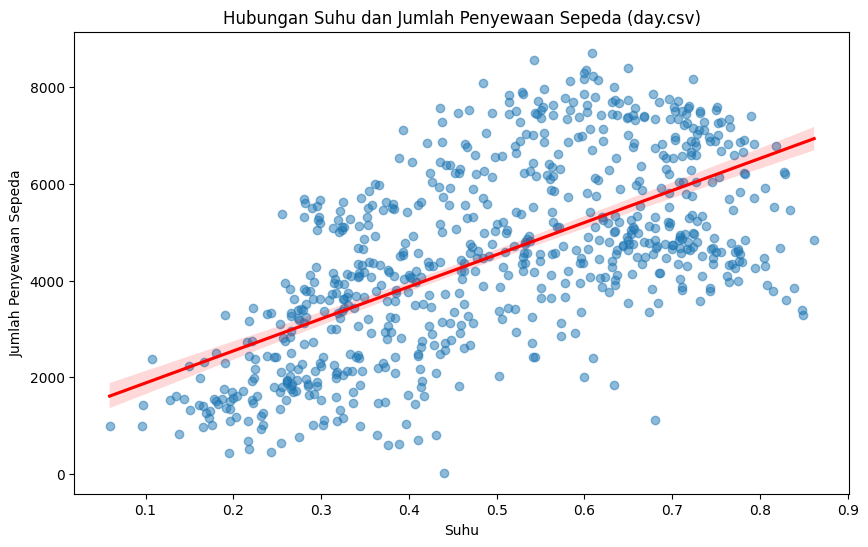

In [8]:
plt.figure(figsize=(10, 6))
sns.regplot(x='temp', y='cnt', data=day_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Hubungan Suhu dan Jumlah Penyewaan Sepeda (day.csv)')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')

plt.show()

**Insight:**
- Variabel temp mewakili suhu, sementara cnt menunjukkan jumlah penyewaan sepeda. Ini adalah dua fitur numerik yang relevan untuk analisis.
-  Garis merah yang ditambahkan melalui line_kws={'color':'red'} menunjukkan hubungan linear antara suhu dan jumlah penyewaan. Jika garis regresi miring ke atas, ini menunjukkan bahwa ada kecenderungan bahwa peningkatan suhu dihubungkan dengan peningkatan jumlah penyewaan sepeda.
- Jika analisis menunjukkan bahwa garis regresi menunjukkan kemiringan positif, ini mengindikasikan bahwa suhu yang lebih tinggi cenderung berhubungan dengan jumlah penyewaan sepeda yang lebih tinggi. Ini adalah insight yang umum, mengingat bahwa cuaca yang lebih baik seringkali mendorong orang untuk bersepeda lebih banyak.

### Pertanyaan 3:

C:\Users\NABIL\AppData\Local\Temp\ipykernel_18824\576709574.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=hour_df, ci=None, marker='o', linestyle='-', color='blue', linewidth=2, markersize=6)


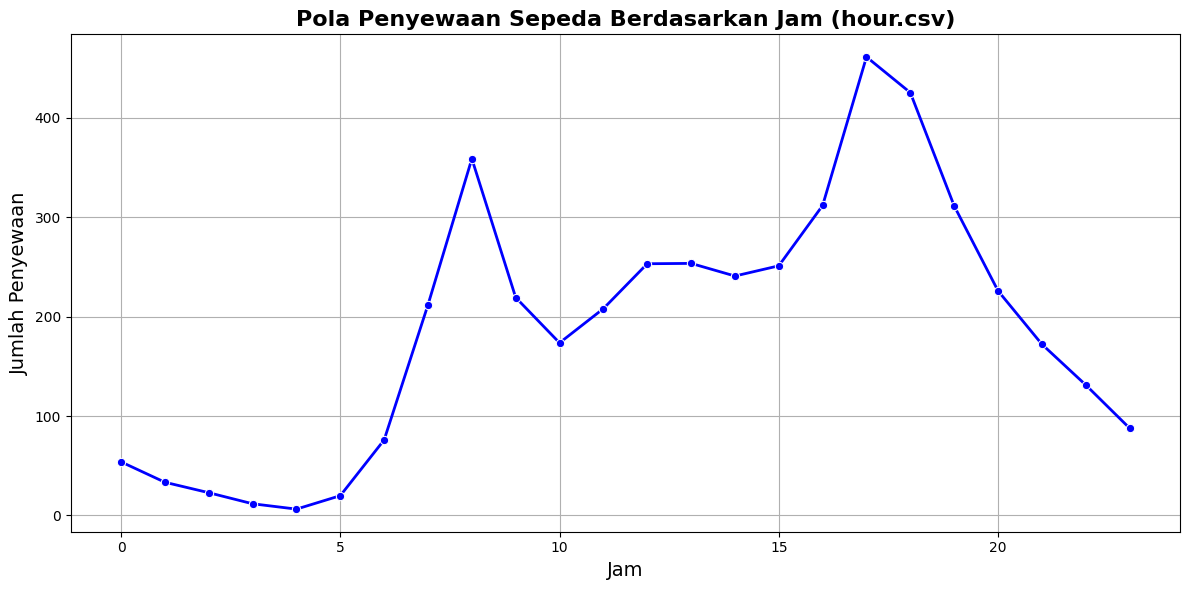

In [9]:
plt.figure(figsize=(12, 6))

# Create the line plot with enhancements
sns.lineplot(x='hr', y='cnt', data=hour_df, ci=None, marker='o', linestyle='-', color='blue', linewidth=2, markersize=6)

# Adding titles and labels
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam (hour.csv)', fontsize=16, fontweight='bold')
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjusts the padding between and around subplots
plt.show()

**Insight:**
-  Garis yang terbentuk menunjukkan tren penyewaan sepeda berdasarkan waktu. Dari plot ini, kita bisa mengamati apakah ada pola harian yang konsisten, misalnya, apakah jumlah penyewaan meningkat pada jam-jam tertentu, seperti pagi atau sore, yang seringkali terkait dengan aktivitas commuting atau rekreasi.
- Dengan melihat grafik, kita dapat mengidentifikasi jam-jam dengan jumlah penyewaan tertinggi dan terendah. Misalnya, jika terdapat lonjakan signifikan pada jam 7-9 pagi dan 5-7 sore, ini bisa mengindikasikan bahwa banyak orang menggunakan sepeda untuk perjalanan pergi dan pulang kerja.
- Garis yang terbentuk menunjukkan tren penyewaan sepeda berdasarkan waktu. Dari plot ini, kita bisa mengamati apakah ada pola harian yang konsisten, misalnya, apakah jumlah penyewaan meningkat pada jam-jam tertentu, seperti pagi atau sore, yang seringkali terkait dengan aktivitas commuting atau rekreasi.

### Pertanyaan 4:

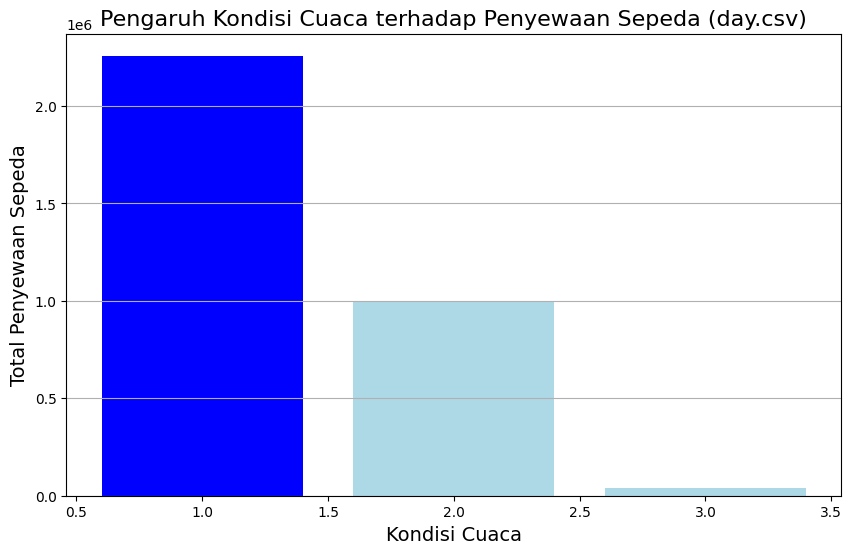

In [10]:
weather_counts = day_df.groupby('weathersit')['cnt'].sum().reset_index()

# Menemukan nilai maksimum untuk menentukan warna
max_count = weather_counts['cnt'].max()

# Membuat histogram
plt.figure(figsize=(10, 6))

# Menggambar bar plot dengan warna yang ditentukan
for index, row in weather_counts.iterrows():
    if row['cnt'] == max_count:
        plt.bar(row['weathersit'], row['cnt'], color='blue')  # Bar tertinggi
    else:
        plt.bar(row['weathersit'], row['cnt'], color='lightblue')  # Bar lainnya

# Menambahkan judul dan label
plt.title('Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda (day.csv)', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=14)
plt.ylabel('Total Penyewaan Sepeda', fontsize=14)

# Menambahkan grid untuk kejelasan
plt.grid(axis='y')

# Menampilkan plot
plt.show()

**Insight:**
- Kode ini mengelompokkan data penyewaan sepeda berdasarkan weathersit (kondisi cuaca) dan menghitung total jumlah penyewaan (cnt) untuk masing-masing kondisi. Ini memungkinkan kita untuk melihat seberapa besar pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda.
- Dengan mencari nilai maksimum jumlah penyewaan (max_count), kode ini menyoroti kondisi cuaca yang paling banyak berkontribusi pada penyewaan. Ini memberikan informasi yang berguna tentang bagaimana cuaca dapat mempengaruhi keputusan orang untuk menyewa sepeda.
- Jika terdapat kondisi cuaca tertentu (seperti hujan atau berangin) yang menunjukkan jumlah penyewaan yang sangat rendah, ini mengindikasikan bahwa cuaca yang tidak mendukung dapat secara signifikan mengurangi minat orang untuk menggunakan sepeda.

## Conclusion

- Musim memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Musim panas atau musim semi, di mana kondisi cuaca lebih kondusif untuk bersepeda, cenderung menunjukkan peningkatan jumlah penyewaan sepeda. Perusahaan dapat fokus meningkatkan stok sepeda dan melakukan promosi selama musim-musim dengan permintaan tinggi, seperti musim panas. Sebaliknya, pada musim dingin atau musim hujan, promosi khusus atau penyesuaian layanan mungkin diperlukan untuk menarik pelanggan.
-  Suhu harian memengaruhi tingkat penyewaan sepeda. Pada hari-hari dengan suhu yang lebih hangat (tidak terlalu panas atau dingin), penyewaan cenderung meningkat. Ini menunjukkan bahwa kondisi iklim sedang lebih menarik bagi pelanggan. Untuk perusahaan, penting untuk menyiapkan strategi yang fleksibel berdasarkan prediksi cuaca, seperti menawarkan diskon pada hari-hari yang kurang ideal, atau memberikan layanan ekstra pada hari-hari dengan suhu yang lebih nyaman.
- Penyewaan sepeda cenderung meningkat pada jam-jam sibuk (misalnya pagi dan sore) ketika suhu berada pada tingkat yang nyaman. Hal ini menunjukkan bahwa selain suhu, aktivitas rutin pelanggan (seperti berangkat atau pulang kerja) juga memengaruhi pola penyewaan. Perusahaan dapat meningkatkan jumlah sepeda yang tersedia dan promosi selama jam-jam tersebut untuk memaksimalkan keuntungan. Pada jam-jam yang lebih dingin atau panas, layanan penyesuaian mungkin diperlukan.
-  Cuaca buruk seperti hujan atau kabut cenderung menyebabkan penurunan penyewaan sepeda. Cuaca cerah dan stabil mendukung jumlah penyewaan yang lebih tinggi. Oleh karena itu, perusahaan perlu merancang strategi untuk mengantisipasi cuaca buruk, seperti menawarkan promosi khusus atau memberikan layanan perlengkapan cuaca (misalnya jas hujan atau penutup sepeda) agar tetap menarik bagi pelanggan dalam kondisi cuaca yang tidak ideal.